# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Что необходимо сделать для исследования:
* Предобработка данных (общий анализ входых данных, исправление ошибок, заполнение пропусков и другие действия, позволяющие начать работать корректно с данными)
* Добавление новых параметров, которые необходимы для исследования
* Изучение влияний параметров в данных на продажу квартир
* Вывод

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Замечания:
При первоначальном открытии файла было замечено, что все данные разделены не запятой, как это обычно бывает, а через '\t'. Поэтому здесь в открытии файла добавлен аргумент sep.

При просмотре первых строк данных видим, что в таблице есть пропущенные значения. Подсчитаем количество пропущенных значений и дубликатов и рассмотрим данные подробнее на наличие аномалий.

А также построим общую гистограмму для всех столбцов таблицы.

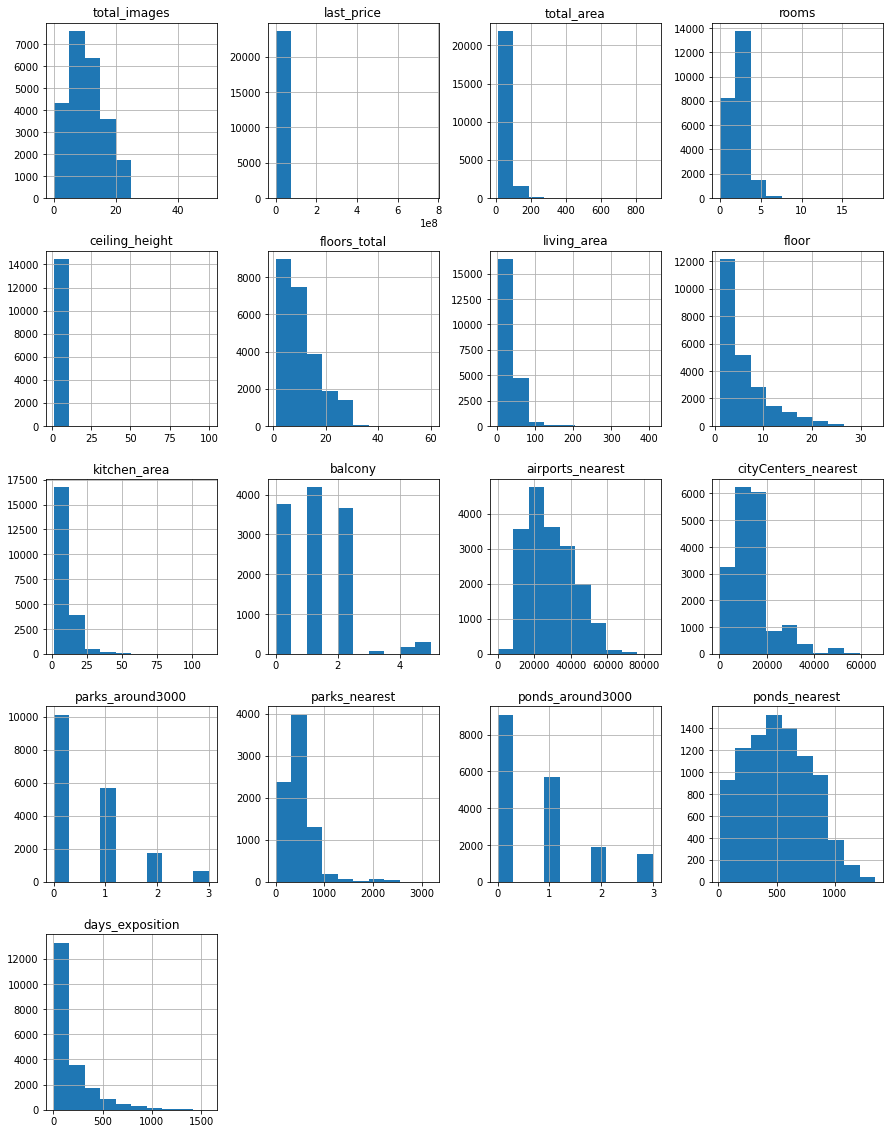

In [3]:
data.hist(figsize=(15, 20));

### Предобработка данных

In [4]:
#посчитаем пропущенные значения
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

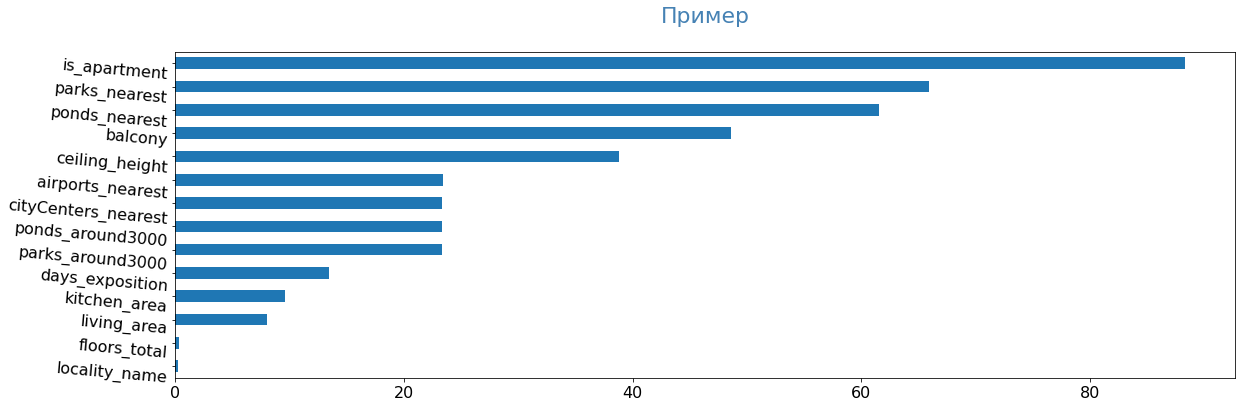

In [6]:
pass_value_barh(data)

In [7]:
#а также проверим дубликаты в таблице
data.duplicated().count()

23699

Видим, что в большинстве случаев пропущенные значения - это какие-либо числовые переменные. Плюс в нашей таблице много дубликатов. Попробуем это исправить.

Скорее всего, в столбцах 'is_apartment', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' отсутсвие значений означает отсутствие объекта (балкона в квартире, парка по близости итп). Эти пропуски можно заполнить каким-либо простым понятным значением (например, 0 или -1). Для этого также нужно будет изменить тип данных. В столбце 'is_apartment' пустые значения заменим на False.
Здесь интуитивно понятно, что могут означать пропуски. Пропущенные значения в 'locality_name' можно также заменить на общую категорию "Остальное". А вот с остальными параметрами ситуация состоит сложнее. Попробуем с этим разобраться. 

In [8]:
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)
data['locality_name'] = data['locality_name'].fillna('Остальные')
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['airports_nearest'] = data['airports_nearest'].fillna(0)
for col in ['balcony', 'parks_around3000', 'ponds_around3000']:
    data[col] = data[col].astype(int)

In [9]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,22060.285497,10886.426896,0.469049,167.315499,0.590911,199.114140,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,16455.276292,9634.613697,0.748534,306.709997,0.883999,305.188777,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,10196.500000,2242.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,21869.000000,11247.000000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,34327.000000,15248.500000,1.000000,301.000000,1.000000,389.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Сменим тип данных в столбце "floors_total" на int и удалим пропуски.

In [10]:
data = data.dropna(subset=['floors_total'])
display(data['floors_total'].isna().sum())
data['floors_total'] = data['floors_total'].astype(int)

0

Здесь мы сразу видим что-то странное с высотой потолков. Максимум - 100 метров, минимум - 1 метр. Построим график.

<AxesSubplot:>

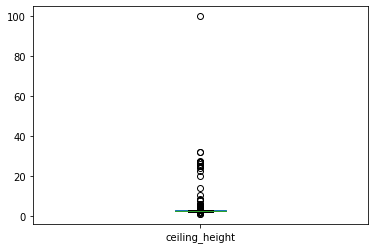

In [11]:
data['ceiling_height'].plot(kind='box')

Видим, что есть выбросы и что в целом значения идут до 40 метром довольно часто. Сложно представить квартиру, в которой потолки выше 5 метров. При этом в этом столбце много пропусков. Попробуем исправить это ситуацию, заменив все странные значения на среднюю высоту потолка (данные подсказывают нам, что это примерно 2.7м)

<AxesSubplot:>

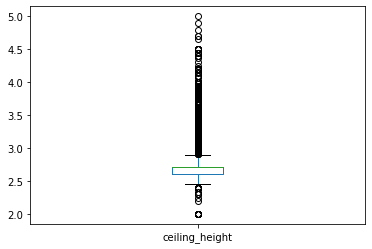

In [12]:
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = 2.7
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = 2.7
data['ceiling_height'] = data['ceiling_height'].fillna(2.72)
data['ceiling_height'].plot(kind='box')

В целом ситуация стала лучше. Теперь проверим столбец 'locality_name' на неявные дубликаты.

In [13]:
display(data['locality_name'].unique())
data['locality_name'].duplicated().sum()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

23248

Из проблем здесь заметно, что некоторые названия записаны в разных регистрах, буква е/ё - разная в разных населенных пунктах. Также объеденим названия "поселок" и "поселок городского типа" в одно название. На анализ данных это изменение негативно не повлияет.

In [14]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')

In [15]:
# check
data['locality_name'].nunique()

330

In [16]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


При анализе столбца 'floors_total' в пропущенных значениях сначала можно предположить, что речь идет о частных домах или одноэтажных, но по столбцу 'floor' мы видим, что этажи указаны и значения там могут достигать 20, 18 этажей. Чтобы сильно не исказить картину, попробуем заполнить пустые значения медианой.

In [17]:
lost_data = data.query('floors_total.isna()')['floor'].unique()
lost_data_median = {}
for item in lost_data:
    lost_data_median[item] = (
        data.query('floor == @item and not floors_total.isna()')['floors_total']
        .median()
    )
for row in data.query('floors_total.isna()').index:
    data.loc[row, 'floors_total'] = lost_data_median[data.loc[row]['floor']]

Проведем проверку, что все этажи в таблице имеют корректное значение и, например, этажность квартиры не превышает этажность дома. Видим, что таких строк у нас не нашлось.

In [18]:
display(data.loc[data['floors_total'] < data['floor']])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Теперь рассмотрим столбцы 'living_area' и 'kitchen_area'.

<AxesSubplot:>

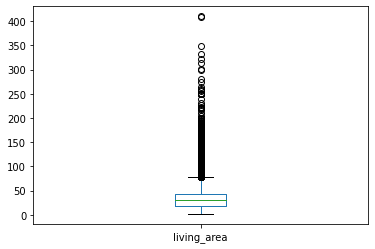

In [19]:
data['living_area'].plot(kind='box')

В целом аномалий сильных нет, но есть пропуски. Этот столбец - один из основных. Здесь сложно сказать, чем обусловлены пропуски. Заменить их на среднее значение тоже не будет являться выходом из ситуации. Поэтому эти данные пока оставим в таком виде.

<AxesSubplot:>

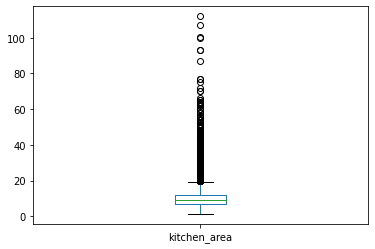

In [20]:
data['kitchen_area'].plot(kind='box')

Если квартиры могут быть большими и это будет считаться нормальным, то в площади кухни > 80 квадратных метров можно усомниться. Также в этом столбце пропуски могут быть еще обусловлены тем, что в некоторых квартирах кухня и жилая площадь объеденены.
Здесь попробуем усреднить выделяющиеся значения. Интернет говорит, что средняя площадь кухни 20% от общей площади квартиры. Проверим и заменим данные, если они не соответствуют.

In [21]:
data.loc[data['kitchen_area'] > 0.8 * data['living_area'], 'kitchen_area'] = 0.8 * data['living_area']
data.query('kitchen_area > 0.8 * living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [22]:
lost_ceiling = list(data.query('ceiling_height.isna()')['floors_total'].unique())
lost_ceiling_median = {}
for floor in lost_ceiling:
    lost_ceiling_median[floor] = (data
                                 .query('floor == @floor and not ceiling_height.isna()')['ceiling_height']
                                 .median())
for row in data.query('ceiling_height.isna()').index:
    data.loc[row, 'ceiling_height'] = lost_ceiling_median[data.loc[row]['floors_total']]

In [23]:
lost_area = [int(i) for i in data.query('living_area.isna()')['total_area'].unique()]
lost_area_median = {}
for total in lost_area:
    lost_area_median[total] = (data
                                 .query('@total-5 < total_area < @total+5 and not living_area.isna()')['living_area']
                                 .median())
for row in data.query('living_area.isna()').index:
    data.loc[row, 'living_area'] = lost_area_median[int(data.loc[row]['total_area'])]

In [24]:
lost_area = [int(i) for i in data.query('living_area.isna()')['total_area'].unique()]
lost_area_median = {}
for total in lost_area:
    lost_area_median[total] = (data
                                 .query('@total-50 < total_area < @total+50 and not living_area.isna()')['living_area']
                                 .median()
                                )
for row in data.query('living_area.isna()').index:
    data.loc[row, 'living_area'] = lost_area_median[int(data.loc[row]['total_area'])]

#### check gap

In [25]:
# check
data[data['total_area']*0.9 <= (data ['living_area']+data ['kitchen_area'])][['total_area'
                                                                                  ,'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.0,59.0,12.0
171,49.0,38.0,10.0
184,30.2,26.1,6.2
220,37.0,28.0,9.0
319,59.7,47.4,6.4
...,...,...,...
23216,114.0,90.2,16.0
23297,48.2,42.2,6.0
23328,54.0,40.0,10.0
23521,65.0,44.0,15.3


Большинство пропусков нелогичны – высота потолков, или площадь кухни. В этом случае и случае аномалий мы попробовали заменить медианным значениям, чтобы общая картина данных была близка к правде.

Осталось разобраться со столбцом 'first_day_exposition'. Преобразуем его в более удобный формат. Также здесь пропуски означают, скорее всего, что объявление еще актуально. Поэтому эти данные можно оставить в таком виде.

In [26]:
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим все данные еще раз (тип данных, наличие дупликатов, аномалий итп)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

In [28]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2231
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3172
dtype: int64

Видим, что общая картина данных стала объективнее и понятнее. Поэтому перейдем к подсчету дополнительных данных и добавим их в таблицу

In [29]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,613.00","23,613.00","23,613.00","20,441.00","23,613.00","23,613.00","21,382.00","23,613.00","23,613.00"
min,0.00,12.00,2.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,5.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


In [30]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,8015
2,7913
3,5795
4,1177
5,325
0,194
6,104
7,59
8,12
9,8


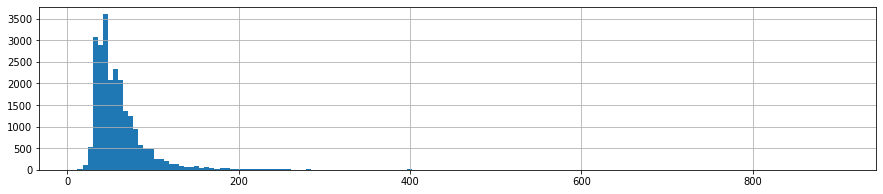

In [31]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

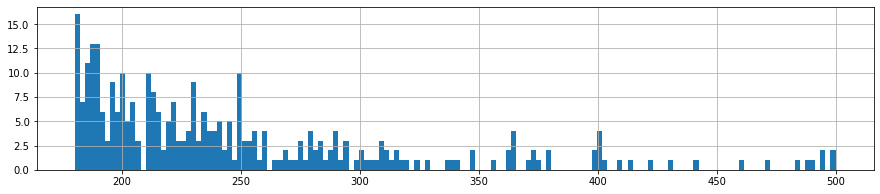

In [32]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [33]:
# check
data.total_area.value_counts(bins =20)

(11.111, 56.4]    13504
(56.4, 100.8]      8315
(100.8, 145.2]     1161
(145.2, 189.6]      369
(189.6, 234.0]      119
(234.0, 278.4]       61
(278.4, 322.8]       36
(322.8, 367.2]       14
(367.2, 411.6]       14
(456.0, 500.4]        9
(411.6, 456.0]        4
(589.2, 633.6]        4
(500.4, 544.8]        2
(855.6, 900.0]        1
(544.8, 589.2]        0
(633.6, 678.0]        0
(678.0, 722.4]        0
(722.4, 766.8]        0
(766.8, 811.2]        0
(811.2, 855.6]        0
Name: total_area, dtype: int64

In [34]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,25.33,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.72,95.00,"4,650,000.00",30.00,9.00,4.00,9.00
0.9,3.00,93.40,3.00,460.00,"10,900,000.00",55.00,15.10,13.00,22.00
0.9976,7.00,309.80,4.00,"1,311.83","82,000,000.00",187.30,45.00,25.00,27.00


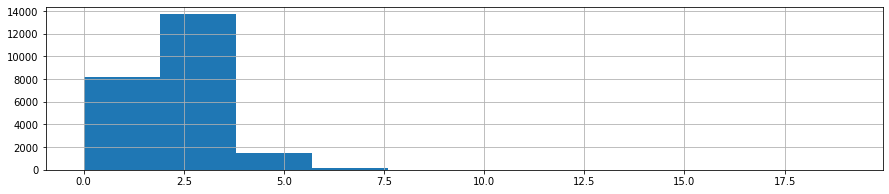

In [35]:
data.rooms.hist(bins=10, figsize = (15,3));

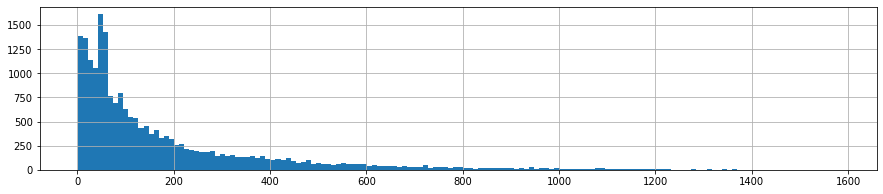

In [36]:
# check
data.days_exposition.hist(bins = 150, figsize = (15,3));

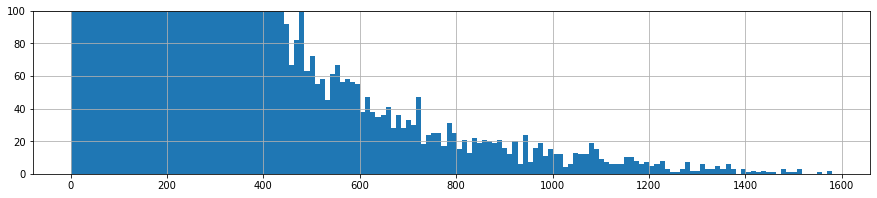

In [37]:
# check
data.days_exposition.hist(bins = 150, figsize = (15,3))
plt.ylim(0, 100);

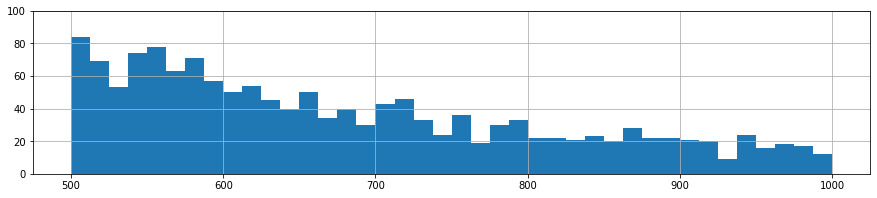

In [38]:
# check
data.days_exposition.hist(bins = 40, figsize = (15,3), range = (500,1000))
plt.ylim(0, 100);

In [39]:
# check
data[data.days_exposition > 1000]['days_exposition'].count()

274

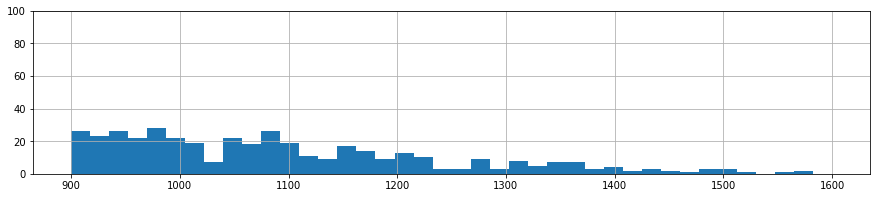

In [40]:
# check
data.days_exposition.hist(bins = 40, figsize = (15,3), range = (900,1600))
plt.ylim(0, 100);

In [41]:
# check
data = data[(data.days_exposition <= 1000) | (data.days_exposition.isna())]

In [42]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23339 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23339 non-null  int64         
 1   last_price            23339 non-null  float64       
 2   total_area            23339 non-null  float64       
 3   first_day_exposition  23339 non-null  datetime64[ns]
 4   rooms                 23339 non-null  int64         
 5   ceiling_height        23339 non-null  float64       
 6   floors_total          23339 non-null  int64         
 7   living_area           23339 non-null  float64       
 8   floor                 23339 non-null  int64         
 9   is_apartment          23339 non-null  bool          
 10  studio                23339 non-null  bool          
 11  open_plan             23339 non-null  bool          
 12  kitchen_area          21122 non-null  float64       
 13  balcony         

In [43]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир


(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,339.00","23,339.00","23,339.00","20,167.00","23,339.00","23,339.00","21,122.00","23,339.00","23,339.00"
min,0.00,12.00,2.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,5.00,"1,000.00","763,000,000.00",409.70,112.00,33.00,60.00


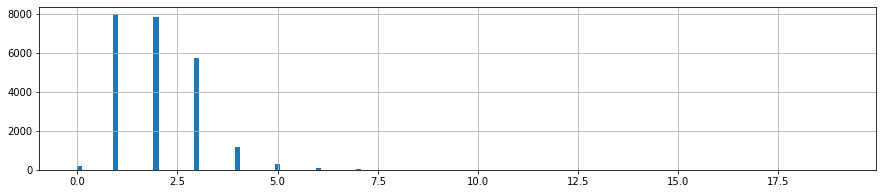

In [44]:
data.rooms.hist(bins = 150, figsize = (15,3));

Удалим комнаты, где значения равно 0 или больше 5. В жизни очень редко получается встретить квартиры с большим количеством комнат, поэтому отнесем это к аномалиям.

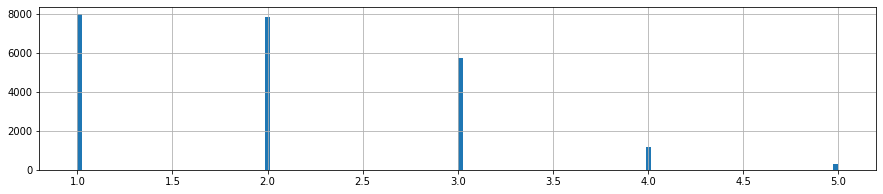

In [45]:
data = data[(data.rooms <= 5) & (data.rooms != 0)]
data.reset_index()
data.rooms.hist(bins = 150, figsize = (15,3));

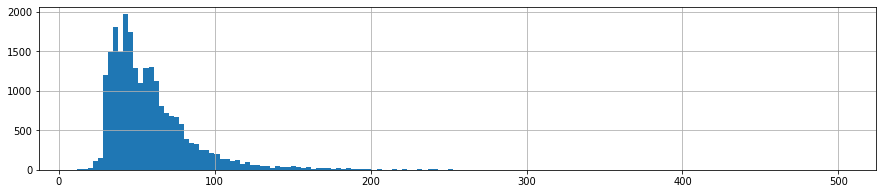

In [46]:
data.total_area.hist(bins = 150, figsize = (15,3));

Видим, что значения близкие к 200 и более - редкость для общей площади квартиры. Посмотрим поближе.

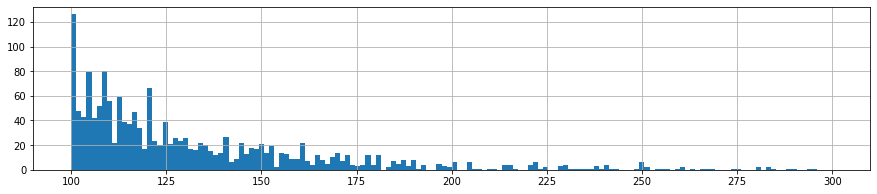

In [47]:
data.total_area.hist(bins = 150, figsize = (15,3), range=(100, 300));

Видим, что после 200 квадратных метров количество квартир резко уменьшается. Поэтому уберем эти значения для исключения аномалий из данных. По общей картине в целом видно, что после 200 идет сильно уменьшение значений.
Также посмотрим квартиры с очень маленькой площадью.

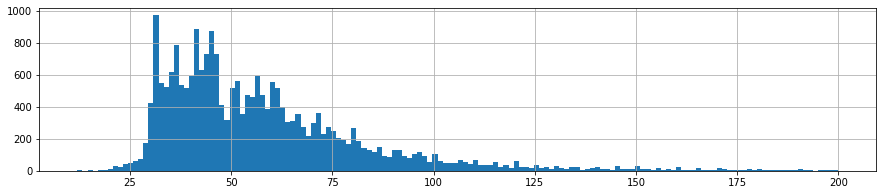

In [48]:
data = data[(data.total_area <= 200) | (data.total_area.isna())]
data.reset_index()
data.total_area.hist(bins = 150, figsize = (15,3));

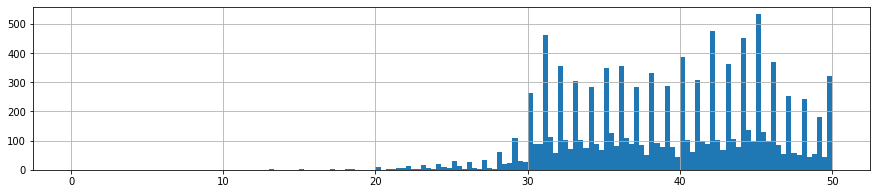

In [49]:
data.total_area.hist(bins = 150, figsize = (15,3), range=(0, 50));

Уберем квартиры с площадью менее 25 квадратных метров. При общем количестве это редкость.

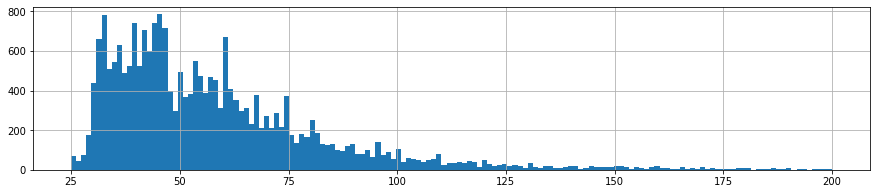

In [50]:
data = data[data.total_area >= 25]
data.reset_index()
data.total_area.hist(bins = 150, figsize = (15,3));

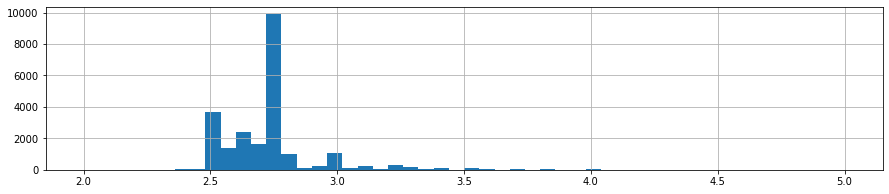

In [51]:
data.ceiling_height.hist(bins = 50, figsize = (15,3));

Здесь видны редкие значения до 2.48 метров и после 3.58. Уберем эти аномалии

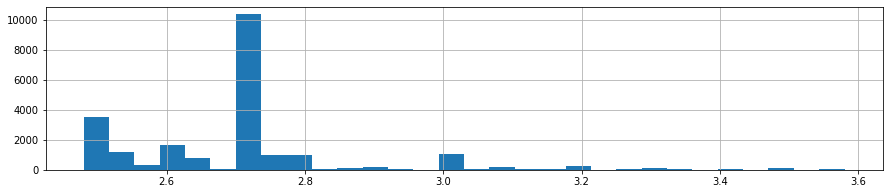

In [52]:
data = data[(data.ceiling_height <= 3.58) & (data.ceiling_height >= 2.48)]
data.reset_index()
data.ceiling_height.hist(bins = 30, figsize = (15,3));

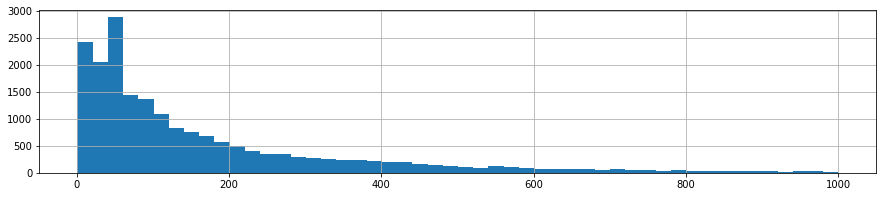

In [53]:
data.days_exposition.hist(bins = 50, figsize = (15,3));

Здесь уберем значения до 3 дней (очень маленькие значения-аномалии). Значения больше 1000 были убраны выше

#### check nan

In [54]:
# check 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22477 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22477 non-null  int64         
 1   last_price            22477 non-null  float64       
 2   total_area            22477 non-null  float64       
 3   first_day_exposition  22477 non-null  datetime64[ns]
 4   rooms                 22477 non-null  int64         
 5   ceiling_height        22477 non-null  float64       
 6   floors_total          22477 non-null  int64         
 7   living_area           22477 non-null  float64       
 8   floor                 22477 non-null  int64         
 9   is_apartment          22477 non-null  bool          
 10  studio                22477 non-null  bool          
 11  open_plan             22477 non-null  bool          
 12  kitchen_area          20590 non-null  float64       
 13  balcony         

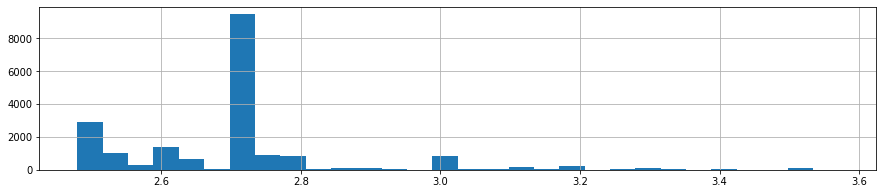

In [55]:
data = data[data.days_exposition >= 3]
data.reset_index()
data.ceiling_height.hist(bins = 30, figsize = (15,3));

In [56]:
# check 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19453 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19453 non-null  int64         
 1   last_price            19453 non-null  float64       
 2   total_area            19453 non-null  float64       
 3   first_day_exposition  19453 non-null  datetime64[ns]
 4   rooms                 19453 non-null  int64         
 5   ceiling_height        19453 non-null  float64       
 6   floors_total          19453 non-null  int64         
 7   living_area           19453 non-null  float64       
 8   floor                 19453 non-null  int64         
 9   is_apartment          19453 non-null  bool          
 10  studio                19453 non-null  bool          
 11  open_plan             19453 non-null  bool          
 12  kitchen_area          17738 non-null  float64       
 13  balcony         

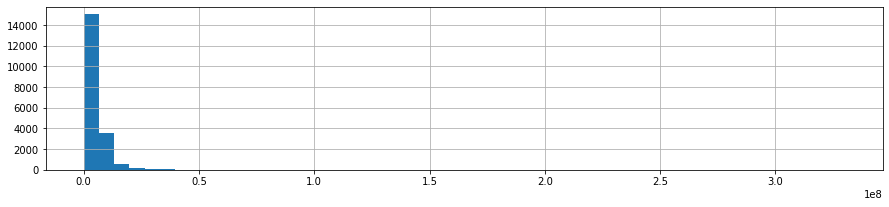

In [57]:
data.last_price.hist(bins = 50, figsize = (15,3));

Уберем редкие значения

In [58]:
data.last_price.value_counts(bins =20)

(-317797.811, 16511580.5]     18960
(16511580.5, 33010971.0]        387
(33010971.0, 49510361.5]         66
(49510361.5, 66009752.0]         25
(66009752.0, 82509142.5]          8
(115507923.5, 132007314.0]        3
(82509142.5, 99008533.0]          3
(313500609.5, 330000000.0]        1
(132007314.0, 148506704.5]        0
(148506704.5, 165006095.0]        0
(99008533.0, 115507923.5]         0
(181505485.5, 198004876.0]        0
(198004876.0, 214504266.5]        0
(214504266.5, 231003657.0]        0
(231003657.0, 247503047.5]        0
(247503047.5, 264002438.0]        0
(264002438.0, 280501828.5]        0
(280501828.5, 297001219.0]        0
(297001219.0, 313500609.5]        0
(165006095.0, 181505485.5]        0
Name: last_price, dtype: int64

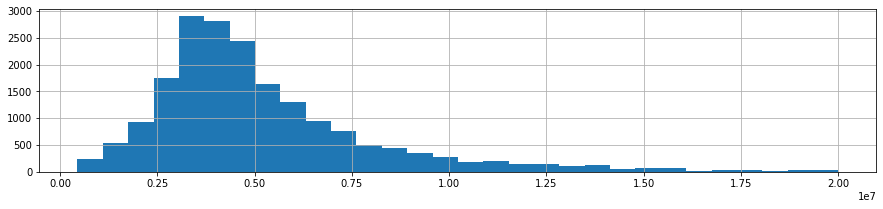

In [59]:
data = data[(data.last_price >= 450000) & (data.last_price <= 20_000_000)]
data.reset_index()
data.last_price.hist(bins = 30, figsize = (15,3));

In [60]:
# check 
data.shape

(19121, 22)

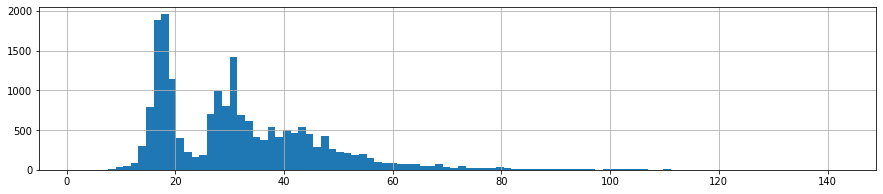

In [61]:
data.living_area.hist(bins = 100, figsize = (15,3));

Посмотрим подробнее значения после 40 квадратных метров

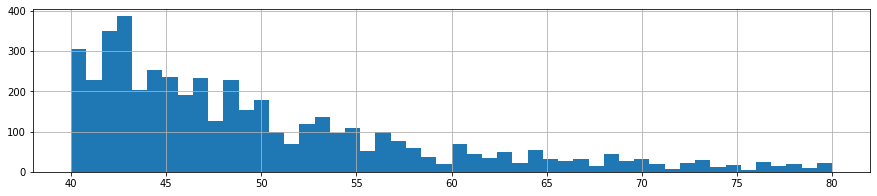

In [62]:
data.living_area.hist(bins = 50, figsize = (15,3), range=(40, 80));

После 55 квадратных метров количество квартир уже меньше 100. Обозначим это редкими значениями и уберем из общей таблицы

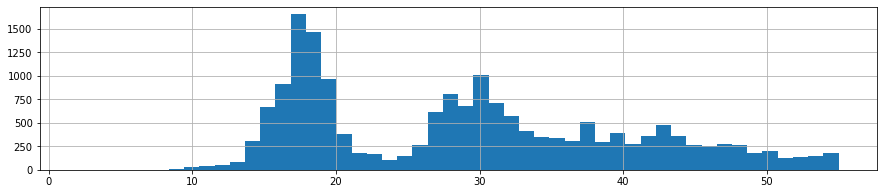

In [63]:
data = data[(data.living_area <= 55) | (data.living_area.isna())]
data.reset_index()
data.living_area.hist(bins = 50, figsize = (15,3));

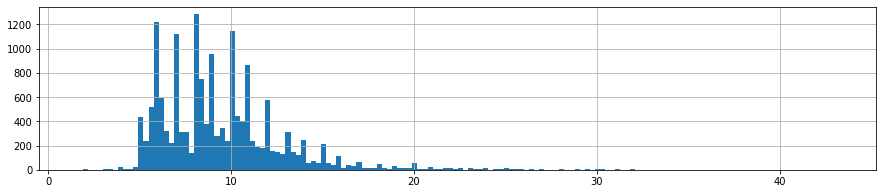

In [64]:
data.kitchen_area.hist(bins = 150, figsize = (15,3));

Рассмотрим подробнее значения после 10 квадратных метров.

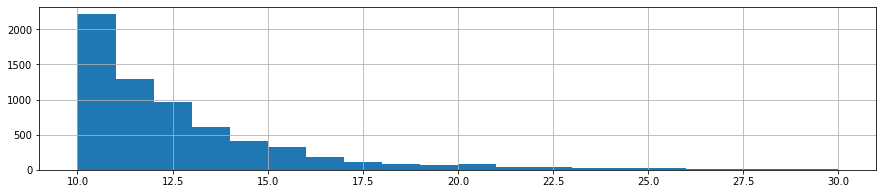

In [65]:
data.kitchen_area.hist(bins = 20, figsize = (15,3), range=(10,30));

Обратим внимание, что после значения 40 количество кухонь очень маленькое по сравнению с остальными показателями. Также очень мало значений с площадью менее 5 квадратных метров.

In [66]:
# check 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17902 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          17902 non-null  int64         
 1   last_price            17902 non-null  float64       
 2   total_area            17902 non-null  float64       
 3   first_day_exposition  17902 non-null  datetime64[ns]
 4   rooms                 17902 non-null  int64         
 5   ceiling_height        17902 non-null  float64       
 6   floors_total          17902 non-null  int64         
 7   living_area           17902 non-null  float64       
 8   floor                 17902 non-null  int64         
 9   is_apartment          17902 non-null  bool          
 10  studio                17902 non-null  bool          
 11  open_plan             17902 non-null  bool          
 12  kitchen_area          16326 non-null  float64       
 13  balcony         

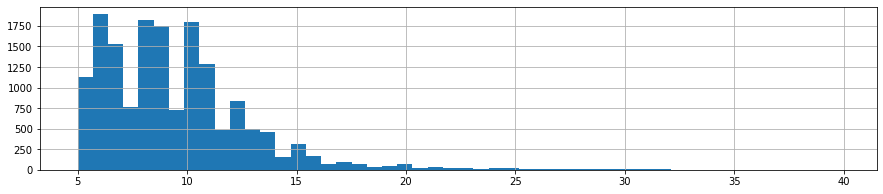

In [67]:
data = data[(data.kitchen_area < 40) & (data.kitchen_area >= 5) | (data.living_area.isna())]
data.reset_index()
data.kitchen_area.hist(bins = 50, figsize = (15,3));

In [68]:
# check 
data.shape

(16242, 22)

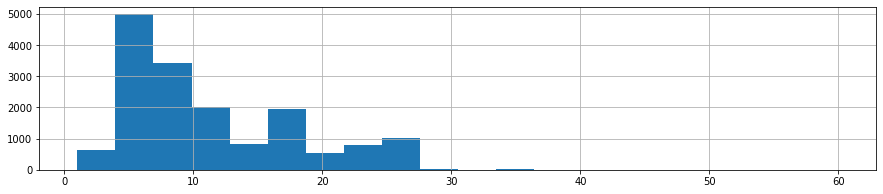

In [69]:
data.floors_total.hist(bins = 20, figsize = (15,3));

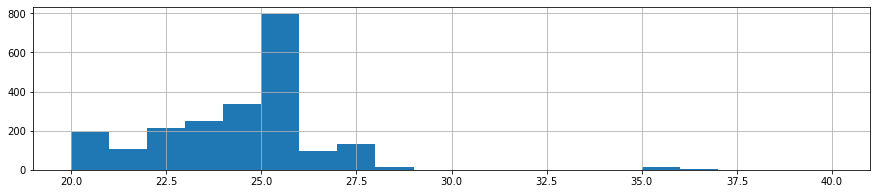

In [70]:
data.floors_total.hist(bins = 20, figsize = (15,3), range=(20, 40));

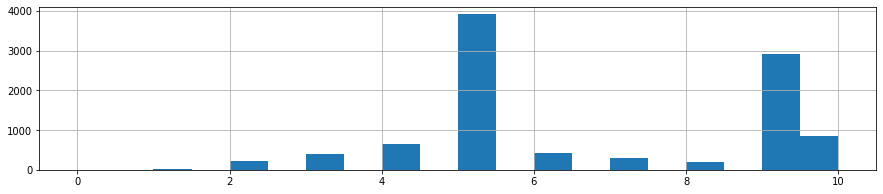

In [71]:
data.floors_total.hist(bins = 20, figsize = (15,3), range=(0, 10));

Классические дома обычно бывают от 5 этажей (квартиры с меньшим количеством этажей уберем, это аномалии). А также видно по второму графику, что выше 60-этажных домов редко бывают строения. Это единственная аномалия.

In [72]:
# check 
data.shape

(16242, 22)

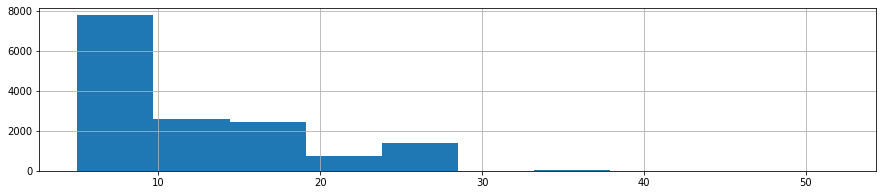

In [73]:
data = data[(data.floors_total < 60) & (data.floors_total >= 5) | (data.floors_total.isna())]
data.reset_index()
data.floors_total.hist(bins = 10, figsize = (15,3));

In [74]:
# check 
data.shape

(14950, 22)

Аномалии и редкие значения рассмотрены во всех столбцах данных.

In [75]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир


(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"14,950.00","14,950.00","14,950.00","14,950.00","14,950.00","14,950.00","14,950.00","14,950.00","14,950.00"
min,1.00,25.00,2.48,3.00,"450,000.00",6.50,5.00,1.00,5.00
max,5.00,190.00,3.56,"1,000.00","20,000,000.00",55.00,39.76,33.00,52.00


### Посчитайте и добавьте в таблицу новые столбцы

Ввнесем в таблицу новые данные, которые помогут для более подробного анализа покупки квартир: цена одного квадратного метра, день публикации объявления (0 - понедельник, 1 - вторник и т.д.), месяц публикации объявления, год публикации объявления, тип этажа квартиры (значения — «первый», «последний», «другой»),расстояние в км до центра города

In [76]:
data['square_price'] = (data['last_price'] / data['total_area']).astype(int)
data['exposition_year'] = data['first_day_exposition'].dt.year
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_day'] = data['first_day_exposition'].dt.dayofweek
data['cityCenters_nearest'] = (data['cityCenters_nearest'] // 1000).astype(int)

In [77]:
last_floor = data.query('floors_total/floor == 1')
data['group'] = data['floor']
data.loc[data['group'] == 1, 'group'] = 'Первый'
data.loc[last_floor.index, 'group'] = 'Последний'
data.loc[(data['group'] != 'Первый') & (data['group']!='Последний'), 'group'] = 'Другой'

In [78]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,exposition_year,exposition_month,exposition_day,group
1,7,3350000.0,40.4,2018-12-04,1,2.72,11,18.6,1,False,...,0,0.0,0,0.0,81.0,82920,2018,12,1,Первый
2,10,5196000.0,56.0,2015-08-20,2,2.72,5,34.3,4,False,...,1,90.0,2,574.0,558.0,92785,2015,8,3,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,100000,2018,6,1,Другой
5,10,2890000.0,30.4,2018-09-10,1,2.72,12,14.4,5,False,...,0,0.0,0,0.0,55.0,95065,2018,9,0,Другой
6,6,3700000.0,37.3,2017-11-02,1,2.72,26,10.6,6,False,...,0,0.0,0,0.0,155.0,99195,2017,11,3,Другой


Необходимые дополнительные параметры внесены в таблицу данных. Теперь перейдем к основному вопросу. 

### Проведите исследовательский анализ данных

Построим диаграммы по основным параметрам.

<AxesSubplot:>

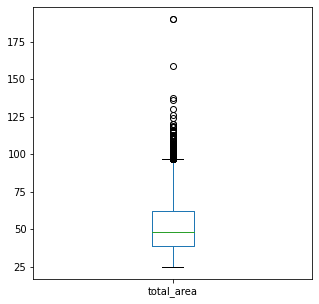

In [79]:
data['total_area'].plot(kind='box', figsize=(5, 5))

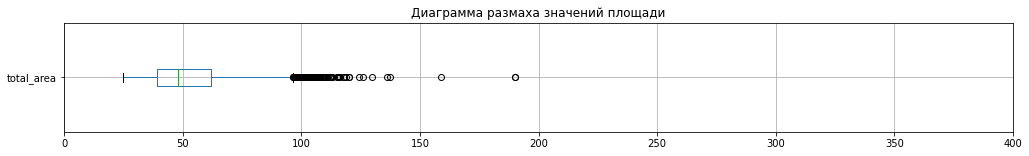

In [80]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

Рассмотрим квартиры с площадью до 100 квадратных метров. Они нам подходят больше всего. Все остальные значения выбиваются из общего числа.

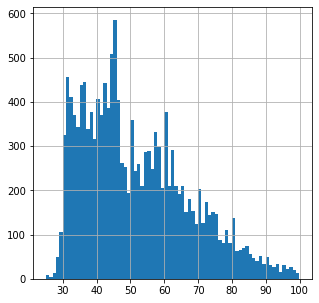

In [81]:
data.query('total_area < 100')['total_area'].hist(bins=75, figsize=(5, 5));

По гистограмме видно, что в целом картина без ярко выраженных аномалий. Чаще всего, преобретают квартиры в районе 30-45 квадратных метров.
Далее рассмотрим параметр 'last_price'

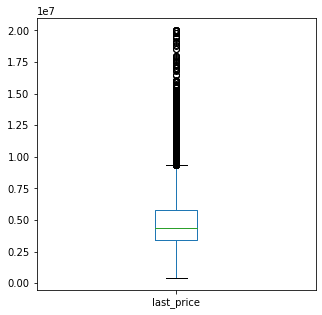

In [82]:
data['last_price'].plot(kind='box', figsize=(5, 5));

In [83]:
(data['last_price'] / 1000).describe()

count    14950.000000
mean      4937.711338
std       2390.775812
min        450.000000
25%       3450.000000
50%       4400.000000
75%       5800.000000
max      20000.000000
Name: last_price, dtype: float64

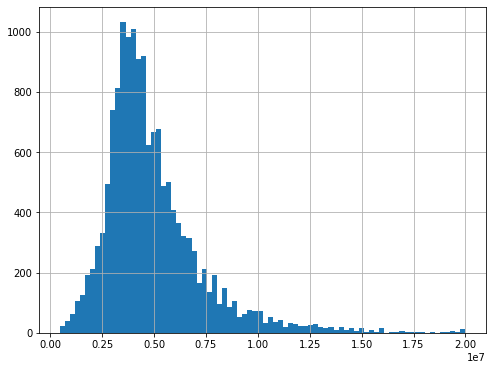

In [84]:
data['last_price'].hist(bins=80, figsize=(8, 6));

Здесь числа большие и с ними в таком формате работать не очень удобно. Для упрощения в описании все цены были переведены не в рубли, а в тыс. руб. А вобщую картину придется смотреть по частям.

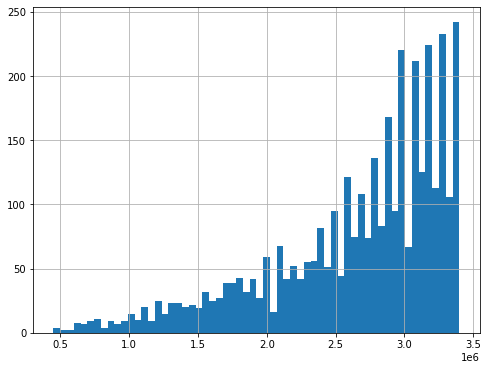

In [85]:
data.query('last_price <= 3400000')['last_price'].hist(bins=60, figsize=(8, 6));

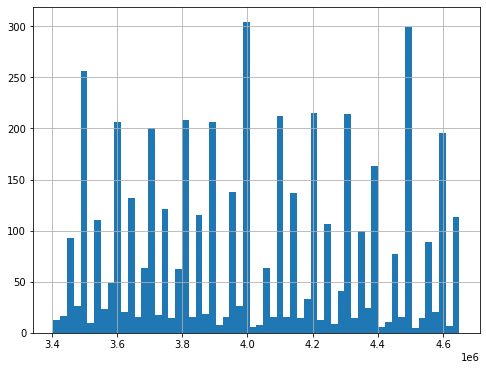

In [86]:
data.query('last_price > 3400000 and last_price <= 4650000')['last_price'].hist(bins=60, figsize=(8, 6));

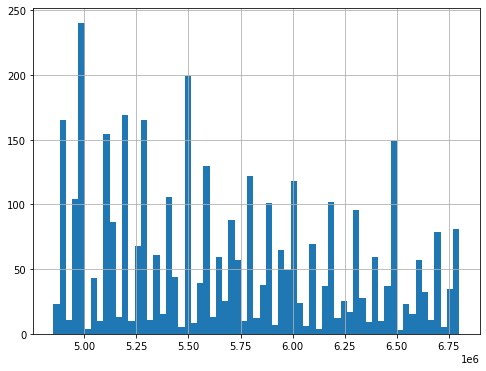

In [87]:
data.query('last_price > 4850000 and last_price <= 6800000')['last_price'].hist(bins=65, figsize=(8, 6));

Здесь для удобства мы рассматриваем данные о цене по квантилям. В первом графике распределение идет равномерное и плавно растет. В остальных такое уже сказать нельзя. Идет разброс по количеству квартир по разным ценам.
Лидером по продажам становятся квартиры стоимостью 3 млн руб. Их количество преобладает.

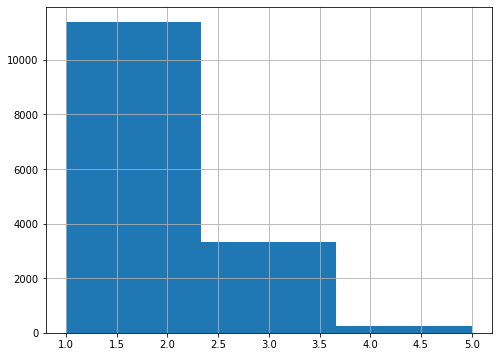

In [88]:
data['rooms'].hist(bins=3, figsize=(8, 6));

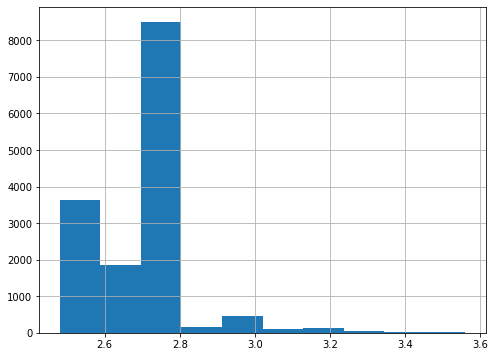

In [89]:
data['ceiling_height'].hist(bins=10, figsize=(8, 6));

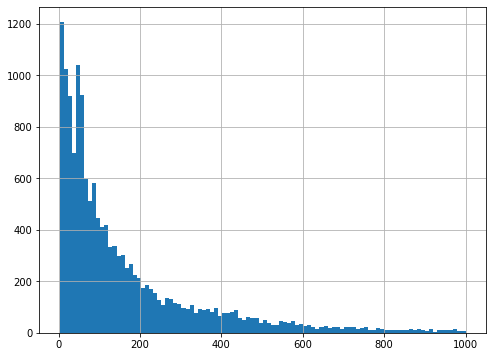

In [90]:
data['days_exposition'].hist(bins=100, figsize=(8, 6));

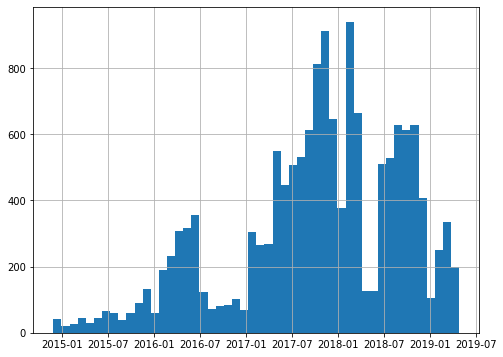

In [91]:
data['first_day_exposition'].hist(bins=50, figsize=(8, 6));

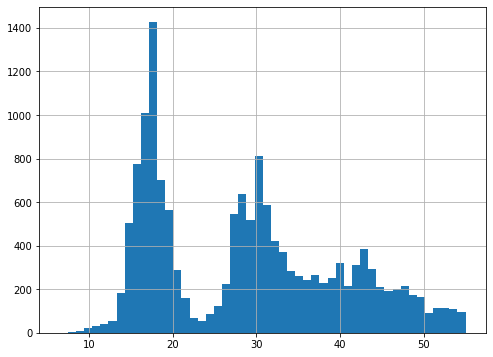

In [92]:
data['living_area'].hist(bins=50, figsize=(8, 6));

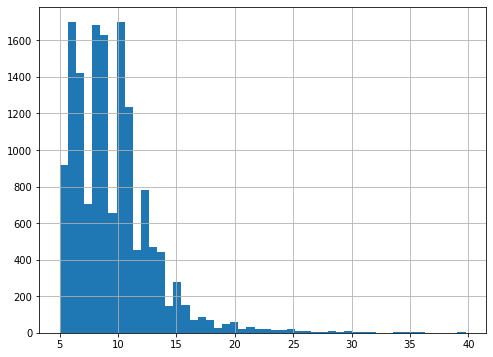

In [93]:
data['kitchen_area'].hist(bins=50, figsize=(8, 6));

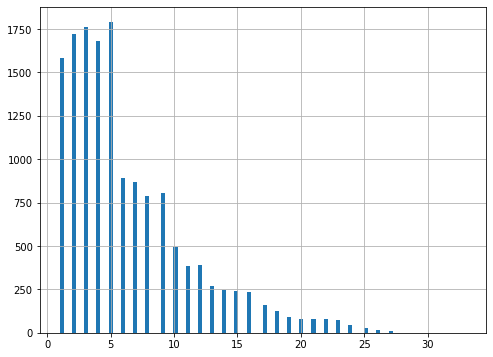

In [94]:
data['floor'].hist(bins=100, figsize=(8, 6));

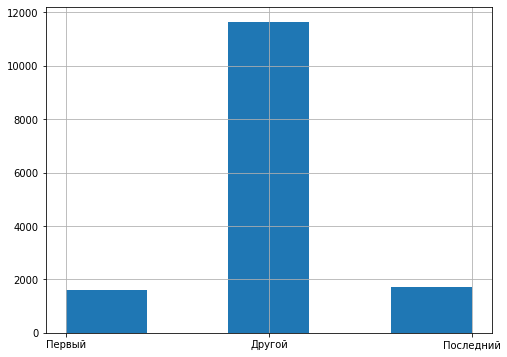

In [95]:
data['group'].hist(bins=5, figsize=(8, 6));

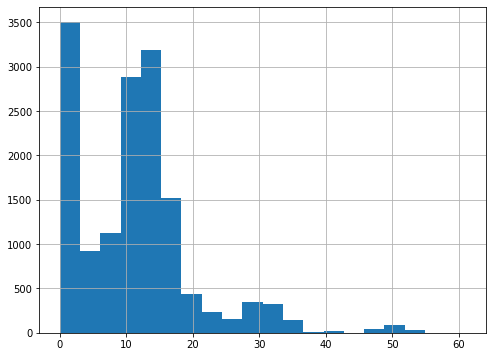

In [96]:
data['cityCenters_nearest'].hist(bins=20, figsize=(8, 6));

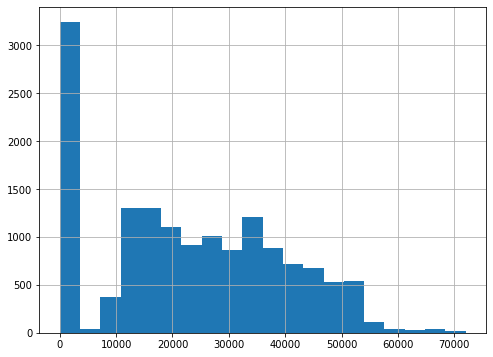

In [97]:
data['airports_nearest'].hist(bins=20, figsize=(8, 6));

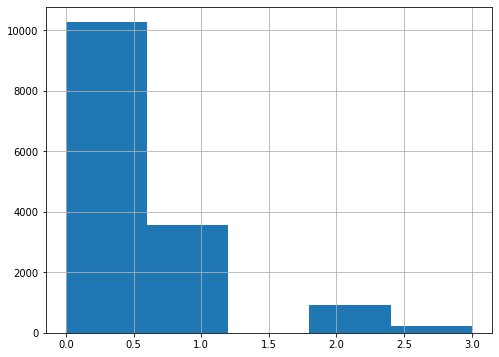

In [98]:
data['parks_around3000'].hist(bins=5, figsize=(8, 6));

Построены гистограммы по основным параметрам. Исключительные квартиры создают большие выбросы, мы попытались это исправить. 
Количество комнат - в приоритете 2-3. Высота потолков –  2.5 и 3 метра для подавляющей части квартир. Среднее время продажи квартиры – до 80-100 дней, самые частые быстрые продажи – в первые 2-3 недели.

Посмотрим, как быстро продаются квартиры. Построим гистограмму и посчитаем среднее и медиану.

In [99]:
data['days_exposition'].agg(['mean','median'])

mean      162.090435
median     92.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

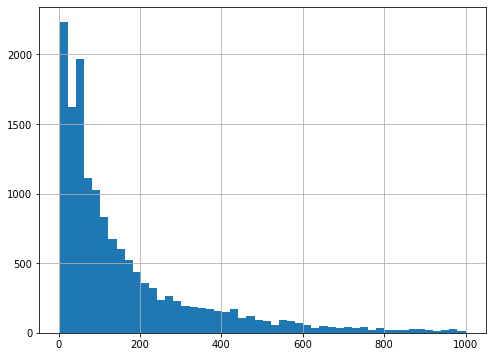

In [100]:
data['days_exposition'].hist(bins=50, figsize=(8, 6))

<AxesSubplot:>

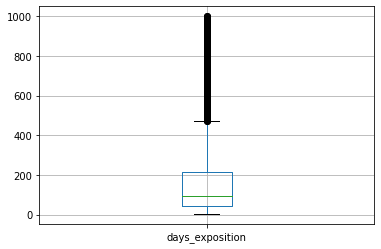

In [101]:
data.boxplot('days_exposition')

<AxesSubplot:>

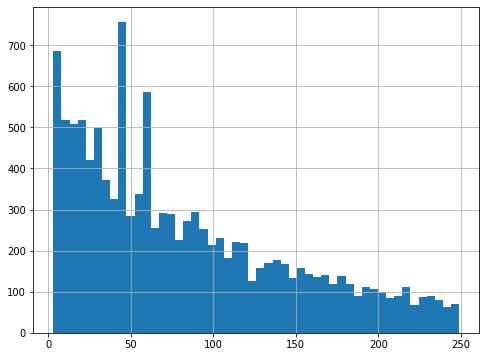

In [102]:
data.query('days_exposition < 250')['days_exposition'].hist(bins=50, figsize=(8, 6))

Если рассматривать общие данные, то среднее время продажи квартины - 180 дней, а медиана - 95 дней.
Но по диаграмме размаха видно, что основные данные находятся примерно до 250 дней продажи. Если построить диаграмму по этим данным, то пик приходится на 40-50 дней.
Можно сделать вывод, "классическая" квартира будет продаваться где-то до 1,5 - 2 месяцец. Если же рассматривать общую картину, то продажа может занять 4-5 месяцев. 

Теперь попробуем ответить на вопрос "Какие факторы больше всего влияют на общую (полную) стоимость объекта?"

In [103]:
data[['last_price', 'living_area']].corr()

,last_price,living_area
last_price,1.000000,0.511203
living_area,0.511203,1.000000


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

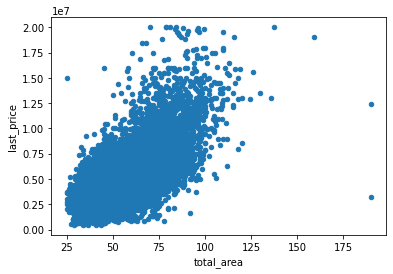

In [104]:
data.plot(x='total_area', y='last_price', kind='scatter')

In [105]:
data[['last_price', 'kitchen_area']].corr()

,last_price,kitchen_area
last_price,1.000000,0.572612
kitchen_area,0.572612,1.000000


<AxesSubplot:xlabel='rooms'>

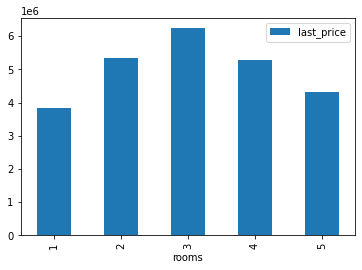

In [106]:
(data
 .pivot_table(index='rooms', 
              values='last_price', 
              aggfunc='mean')
 .plot
 .bar(y='last_price'))

In [107]:
data[['last_price', 'cityCenters_nearest']].corr()

,last_price,cityCenters_nearest
last_price,1.000000,0.029281
cityCenters_nearest,0.029281,1.000000


<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

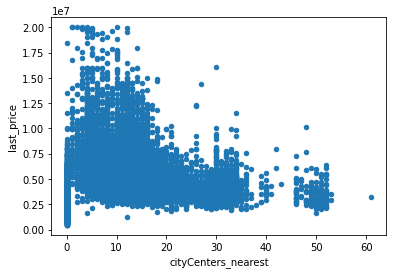

In [108]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter')

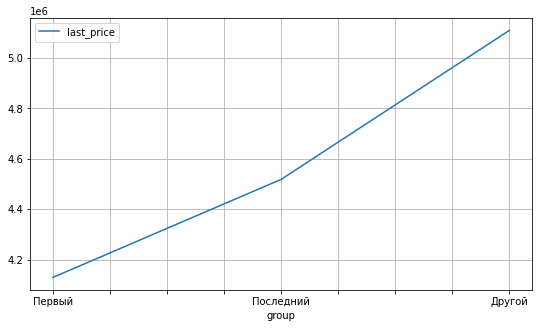

In [109]:
(data
     .pivot_table(index='group', values='last_price').sort_values(by='last_price', ascending=True)
     .plot(grid=True, figsize=(9, 5) )
)
plt.show()

In [110]:
display(data[['last_price', 'exposition_year']].corr())

,last_price,exposition_year
last_price,1.000000,0.007317
exposition_year,0.007317,1.000000


<AxesSubplot:xlabel='exposition_year'>

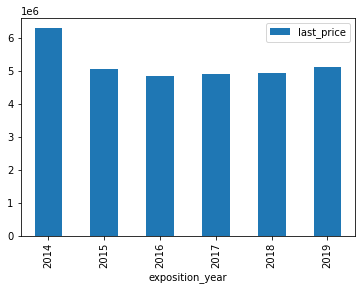

In [111]:
(data
 .pivot_table(index='exposition_year', 
              values='last_price', 
              aggfunc='mean')
 .plot
 .bar(y='last_price'))

<AxesSubplot:xlabel='exposition_year,exposition_month'>

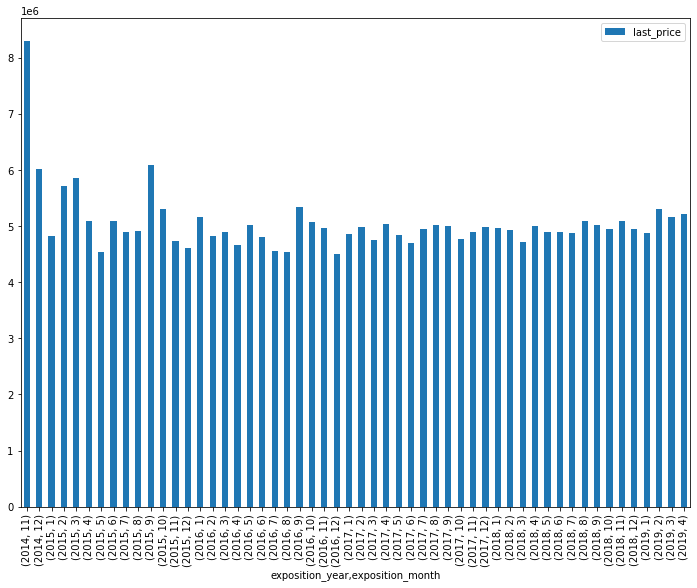

In [112]:
(data
 .pivot_table(index=['exposition_year', 'exposition_month'], 
              values='last_price', 
              aggfunc='mean')
 .plot
 .bar(y='last_price', figsize=(12, 9)))

Рассмотрим общую картину.

In [113]:
data_temp=data[['locality_name','total_area','last_price','rooms','ceiling_height', 'living_area', 'kitchen_area', 'group']].reset_index(drop=True)
data_temp.corr()

,total_area,last_price,rooms,ceiling_height,living_area,kitchen_area
total_area,1.000000,0.693394,0.770029,0.217842,0.882199,0.509849
last_price,0.693394,1.000000,0.375196,0.345834,0.511203,0.572612
rooms,0.770029,0.375196,1.000000,-0.006369,0.904760,0.041206
ceiling_height,0.217842,0.345834,-0.006369,1.000000,0.089809,0.339207
living_area,0.882199,0.511203,0.904760,0.089809,1.000000,0.178793
kitchen_area,0.509849,0.572612,0.041206,0.339207,0.178793,1.000000


In [114]:
data_temp.describe()

,total_area,last_price,rooms,ceiling_height,living_area,kitchen_area
count,14950.000000,1.495000e+04,14950.000000,14950.000000,14950.000000,14950.000000
mean,51.888819,4.937711e+06,1.859666,2.683252,28.935459,9.549126
std,16.416856,2.390776e+06,0.816561,0.138640,11.166771,3.481836
min,25.000000,4.500000e+05,1.000000,2.480000,6.500000,5.000000
25%,39.000000,3.450000e+06,1.000000,2.600000,18.000000,7.000000
50%,48.000000,4.400000e+06,2.000000,2.720000,28.700000,9.000000
75%,62.000000,5.800000e+06,2.000000,2.720000,37.300000,11.000000
max,190.000000,2.000000e+07,5.000000,3.560000,55.000000,39.760000


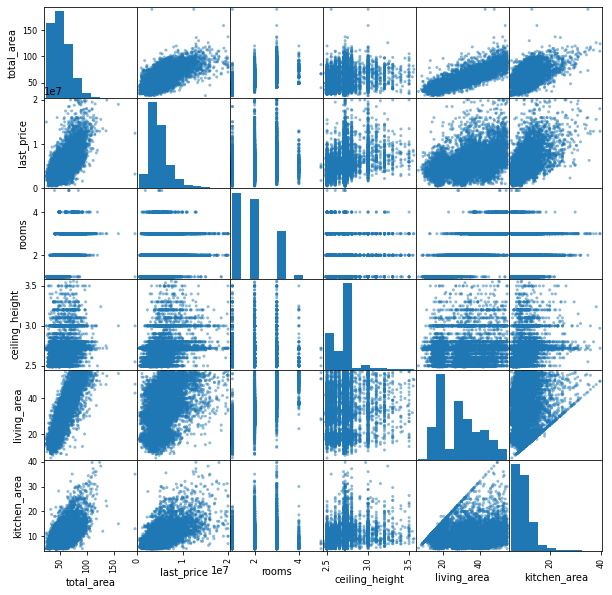

In [115]:
pd.plotting.scatter_matrix(data_temp, figsize=(10, 10));

По этим показателям мы можем заметить, что все они тем или иным образом влияют на цену квартиры. Сильнее всего, корреляция прослеживается по параметрам: жилая площадь и этаж. Все остальные факторы менее важны для покупателей.
На цену сильно вляет местоположение квартиры – квартиры в центре продаются по гораздо большей цене. Количество комнат слабо влияет на цену квартиры, особенно не в центре. Цена сильно меняется при нахождении квартиры выше.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [116]:
data_top = data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
data_top.columns=['number_of_ads']
display(data_top)

,number_of_ads
locality_name,
санкт-петербург,10117
поселок мурино,430
поселок шушары,345
поселок парголово,256
всеволожск,253
колпино,252
деревня кудрово,221
гатчина,208
пушкин,159


Здесь есть явный лидер - это город Санкт-Петербург. Логично, что там продается основная часть квартир. Найдем, где стоимость квартир самая низкая и самая высокая.

In [117]:
data_top['price_total'] = data.pivot_table(index='locality_name', values='square_price', aggfunc='mean')
display(data_top)

,number_of_ads,price_total
locality_name,,
санкт-петербург,10117,106680.867649
поселок мурино,430,85256.700000
поселок шушары,345,77437.553623
поселок парголово,256,90172.953125
всеволожск,253,67386.288538
колпино,252,74462.984127
деревня кудрово,221,91923.542986
гатчина,208,68547.658654
пушкин,159,99879.138365


Самые дорогие квартиры в Санкт-Петербурге, самая низкая цена - в Выборге.

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра. Посмотрим, как стоимость объектов зависит от расстояния до центра города.

In [118]:
spb_data = data.query('locality_name == "санкт-петербург" and not cityCenters_nearest.isna()')
spb_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,exposition_year,exposition_month,exposition_day,group
2,10,5196000.0,56.0,2015-08-20,2,2.72,5,34.3,4,False,...,1,90.0,2,574.0,558.0,92785,2015,8,3,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,100000,2018,6,1,Другой
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,0,0.0,0,0.0,289.0,88524,2017,2,6,Другой
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,1,310.0,2,553.0,137.0,127525,2017,11,3,Другой
15,16,4650000.0,39.0,2017-11-18,1,2.72,14,20.5,5,False,...,1,590.0,1,296.0,19.0,119230,2017,11,5,Другой


<AxesSubplot:>

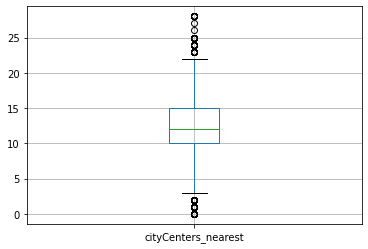

In [119]:
spb_data.boxplot('cityCenters_nearest')

In [120]:
spb_data['cityCenters_nearest'].describe()

count    10117.000000
mean        12.015815
std          4.172102
min          0.000000
25%         10.000000
50%         12.000000
75%         15.000000
max         28.000000
Name: cityCenters_nearest, dtype: float64

По графикам видим, что основая масса квартир находится в пределах 24 км от центра.

In [121]:
display(spb_data['last_price'].sum()/spb_data['cityCenters_nearest'].sum())

469634.32977690763

Квартиры в центре Санкт-Петербурга очень дорогие.

<AxesSubplot:xlabel='cityCenters_nearest'>

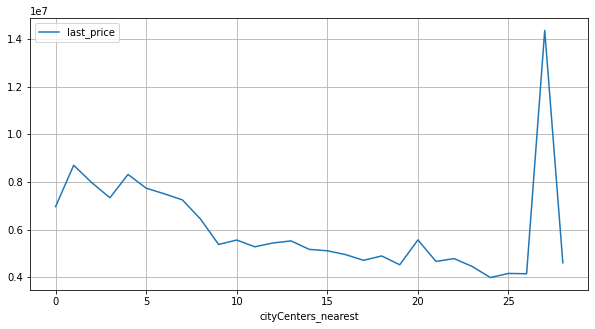

In [122]:
spb_data.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').plot(figsize=(10,5), grid=True)

### Общий вывод

Мы провели полный анализ данных о продаже квартир в Санкт-Петербурге и соседних населенных пунктов. 
Выполнили предобработку данных и изучили их, заменили отсутствующие значения там, где это возможно и можно было исправить. Добавили несколько важных параметров, которых изначально не было в таблице (стоимость 1 квадратного метра, тип этажа квартиры итд).

Основные выводы:
- Больше всего квартир продается в Санкт-Петербурге. Также здесь они являются и самыми дорогими.
- Самые дешевые квартиры по области в Выборге, если говорить про топ 10 самых популярных населенный пунктов
- Очень много "не классических квартир", которые могут искажать общую квартиру. Во многих параметрах в таблице были выбросы и аномалии
- Больше всего влияет на цену квартиры ее площадь
- Если квартира "классическая", то, скорее всего, продажа займет 1-2 месяца, в среднее время продажи - 3-4 месяца
- В среднем на покупку квартиры понадобится 3-4 млн руб., но это опять же для классического, "не аномального" варианта

### Бонус

In [123]:
# check
import seaborn as sns

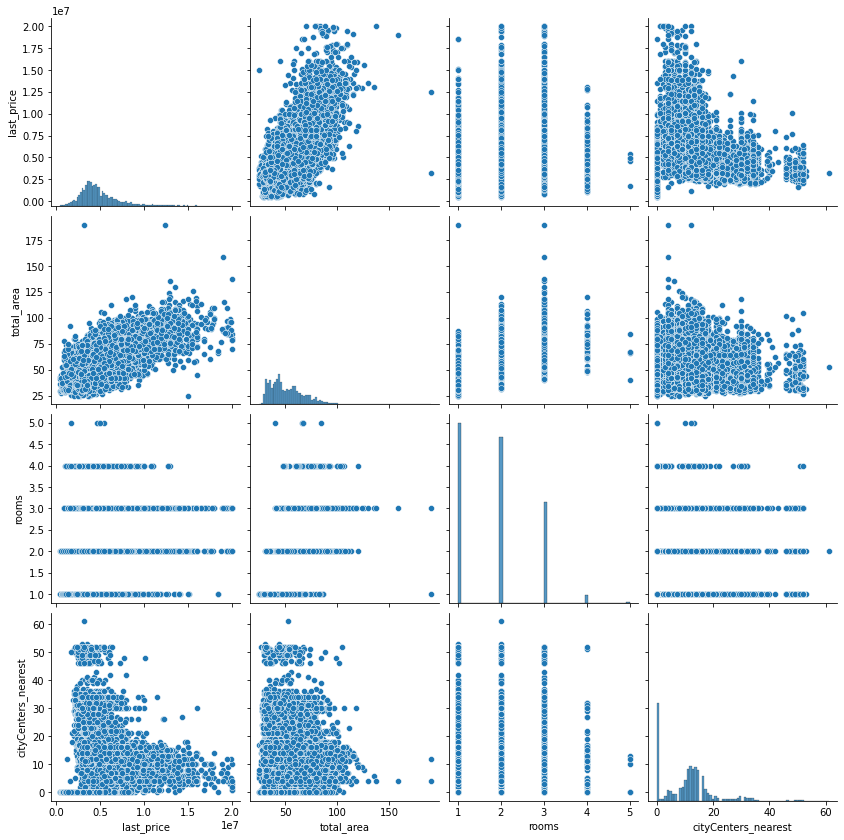

In [124]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в2</b></font>
<br /> 
<font size="3", color = "black">
<br />         
    
[5.2. Scatter - график разброса (точки)](https://pyprog.pro/mpl/mpl_scatter.html?ysclid=l65k3vmmqd649359421)

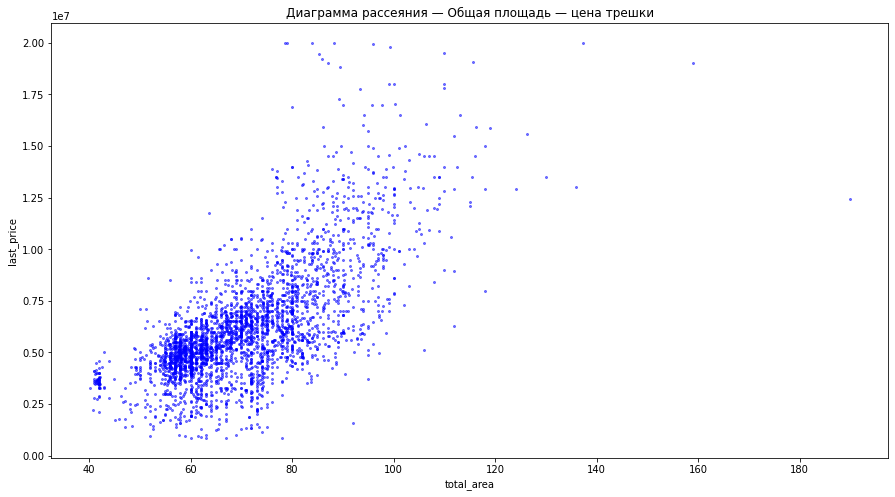

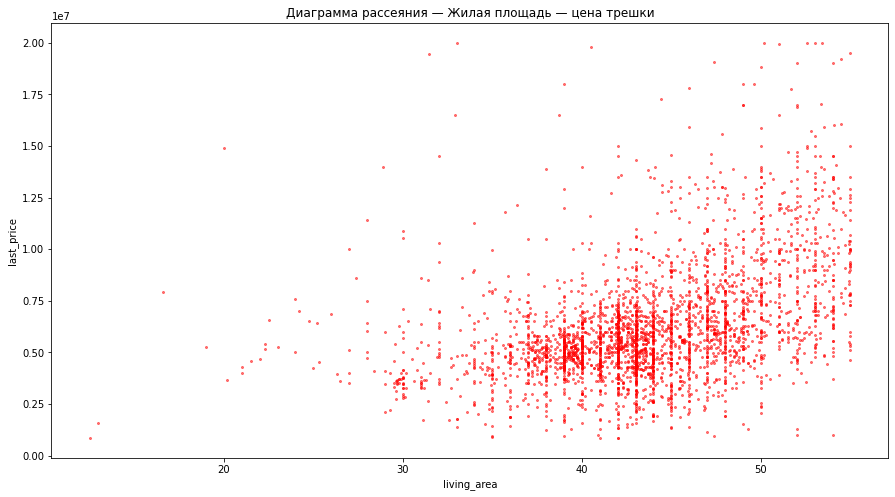

In [125]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');